# Relation between two variables

By Alberto Valdés 

**Mail 1:** anvaldes@uc.cl 

**Mail 2:** alberto.valdes.gonzalez.96@gmail.com

In this notebook we will talk about measures of relation between two variables. In particular for continouos variables we will talk about correlation and for categorical variables we will talk about hypothesis test. 

## 1. Continuous Variables

For continuos variables we use the correlation, which gives a measure of the "Linear Relation" between two variables.

### Theorical Definition

If we consider two random variables, $X$ and $Y$ then the correlation is:

$ corr(X, Y) = \rho_{X, Y} = \cfrac{Cov(X, Y)}{\sigma_x \cdot \sigma_y} $

If for the random variable $X$ we have the observations $x_1, x_2, ..., x_n$ and for the random variable $Y$ we have the observatinos $y_1, y_2, ..., y_n$ then the sample correlation is:

$ corr(X, Y) = \hat{\rho}_{X, Y} = \cfrac{\sum_{i=1}^n (x_i - \bar{x}) \cdot (y_i - \bar{y})}{\sqrt{\sum_{i=1}^n (x_i - \bar{x})^2} \cdot \sqrt{\sum_{i=1}^n (y_i - \bar{y})^2}} $

### Example with dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('supermarket_sales.csv')

**Pearson Matrix**

In [3]:
round(df[['Unit price', 'Rating', 'Total']].corr()*100, 2)

,Unit price,Rating,Total
Unit price,100.00,-0.88,63.40
Rating,-0.88,100.00,-3.64
Total,63.40,-3.64,100.00


In [4]:
corr = df[['Unit price', 'Rating', 'Total']].corr()
corr.style.background_gradient(cmap='coolwarm')

,Unit price,Rating,Total
Unit price,1.000000,-0.008778,0.633962
Rating,-0.008778,1.000000,-0.036442
Total,0.633962,-0.036442,1.000000


### Notable Fact

If in addition to $X$ and $Y$ we consider the random variables $ U = a \cdot X + b $, $ \ V = c \cdot Y  + d \ $ then the absolute value of the correlation between $X$ and $Y$ are equal to the absolute value of the correlation between $U$ and $V$. 
$ \ $

Note that a paricular case is $ a = \cfrac{1}{\sigma_X} $, $ b = - \cfrac{\mathbb{E}(X)}{\sigma_X} $, $ c = \cfrac{1}{\sigma_Y} $, $ d = - \cfrac{\mathbb{E}(Y)}{\sigma_Y} $ $ \ $ i.e. **normalization of the variables**.

**Proof:**

**i. Theorical Correlation**

$ \ $

We known that:

$ \rho_{X, Y} = \cfrac{Cov(X, Y)}{\sqrt{Var(X)} \cdot \sqrt{Var(Y)}} $

$ \ $

Therefore:

$ \rho_{U, V} = \cfrac{Cov(U, V)}{\sqrt{Var(U)} \cdot \sqrt{Var(V)}} $ 

$ \ $

If we analyze each term we have:

$ \ $

$ Cov(U, V) = Cov(a \cdot X + b, V) = Cov(a \cdot X, V) = a \cdot Cov(X, V) = a \cdot \left[ Cov(X, c \cdot Y + d) \right] = a \cdot \left[ Cov(X, c \cdot Y) \right] = a \cdot \left[ c \cdot Cov(X, Y) \right] = a \cdot c \cdot Cov(X, Y)$

$ Var(U) = Var(a \cdot X + b) = Var(a \cdot X) = a^2 \cdot Var(X) $

$ Var(V) = Var(c \cdot Y + d) = Var(c \cdot Y) = c^2 \cdot Var(Y) $

$ \ $

Replacing in $ \rho_{U, V} $ we have:

$ \ $

$ \rho_{U, V} = \cfrac{Cov(U, V)}{\sqrt{Var(U)} \cdot \sqrt{Var(V)}} = \cfrac{a \cdot c \cdot Cov(X, Y)}{\sqrt{a^2 \cdot Var(X)} \cdot \sqrt{c^2 \cdot Var(Y)}} = \cfrac{a}{|a|} \cdot \cfrac{c}{|c|} \cdot \cfrac{Cov(X, Y)}{\sqrt{Var(X)} \cdot \sqrt{Var(Y)}} = sign(a) \cdot sign(c) \cdot \rho_{X, Y} $ 

$ \ $

$ \Rightarrow \ \ \ \rho_{U, V} = sign(a) \cdot sign(c) \cdot \rho_{X, Y} \ \ \ \Rightarrow \ \ \ |\rho_{U, V}| = |sign(a)| \cdot |sign(c)| \cdot |\rho_{X, Y}| = |\rho_{X, Y}| \ \ \ \Rightarrow \ \ \ |\rho_{U, V}| = |\rho_{X, Y}|$ 

$ \ $

**ii. Sample Correlation**

$ \ $

We known that:

$ \hat{\rho}_{X, Y} = \cfrac{\sum_{i=1}^n (x_i - \bar{x}) \cdot (y_i - \bar{y})}{\sqrt{\sum_{i=1}^n (x_i - \bar{x})^2} \cdot \sqrt{\sum_{i=1}^n (y_i - \bar{y})^2}} $

$ \ $

Therefore:

$ \hat{\rho}_{U, V} = \cfrac{\sum_{i=1}^n (u_i - \bar{u}) \cdot (v_i - \bar{v})}{\sqrt{\sum_{i=1}^n (u_i - \bar{u})^2} \cdot \sqrt{\sum_{i=1}^n (v_i - \bar{v})^2}} $

$ \ $

If we analyze each term we have:

$ \ $

$ u_i = a \cdot x_i + b \ \ \ \Rightarrow \ \ \ \bar{u} = a \cdot \bar{x} + b \ \ \ \Rightarrow \ \ \ u_i - \bar{u} = (a \cdot x_i + b) - (a \cdot \bar{x} + b) = a \cdot (x_i - \bar{x}) \ \ \ \Rightarrow \ \ \ (u_i - \bar{u}) = a \cdot (x_i - \bar{x}) $

$ v_i = c \cdot y_i + d \ \ \ \Rightarrow \ \ \ \bar{v} = c \cdot \bar{y} + d \ \ \ \Rightarrow \ \ \ v_i - \bar{v} = (c \cdot y_i + d) - (c \cdot \bar{y} + d) = c \cdot (y_i - \bar{y}) \ \ \ \Rightarrow \ \ \ (v_i - \bar{v}) = c \cdot (y_i - \bar{y}) $

$ \ $

Replacing in $ \hat{\rho}_{U, V} $ we have:

$ \ $

$ \hat{\rho}_{U, V} = \cfrac{\sum_{i=1}^n (u_i - \bar{u}) \cdot (v_i - \bar{v})}{\sqrt{\sum_{i=1}^n (u_i - \bar{u})^2} \cdot \sqrt{\sum_{i=1}^n (v_i - \bar{v})^2}} =  \cfrac{\sum_{i=1}^n a \cdot (x_i - \bar{x}) \cdot c \cdot (y_i - \bar{y})}{\sqrt{\sum_{i=1}^n a^2 \cdot (x_i - \bar{x})^2} \cdot \sqrt{\sum_{i=1}^n c^2 \cdot (y_i - \bar{y})^2}} = \cfrac{a}{|a|} \cdot \cfrac{c}{|c|} \cdot \cfrac{\sum_{i=1}^n (x_i - \bar{x}) \cdot (y_i - \bar{y})}{\sqrt{\sum_{i=1}^n (x_i - \bar{x})^2} \cdot \sqrt{\sum_{i=1}^n (y_i - \bar{y})^2}} = sign(a) \cdot sign(c) \cdot \hat{\rho}_{X, Y} $

$ \ $

$ \Rightarrow \ \ \ \hat{\rho}_{U, V} = sign(a) \cdot sign(c) \cdot \hat{\rho}_{X, Y} \ \ \ \Rightarrow \ \ \ |\hat{\rho}_{U, V}| = |sign(a)| \cdot |sign(c)| \cdot |\hat{\rho}_{X, Y}| = |\hat{\rho}_{X, Y}| \ \ \ \Rightarrow \ \ \ |\hat{\rho}_{U, V}| = |\hat{\rho}_{X, Y}|$ 

## 2. Categorical Variables

For categorical variables we use Hypothesis test.

$ H_0: $ The two variables are independent. Thus the events generated by them are too.
$ \ $

$ H_a: $ The two variable aren't independent.

### Example 1

We will analyze the random variables $ \ Branch \ $ and $ \ City \ $. First of all we get the **observed** frequency table of the two variables:

In [5]:
pd.crosstab(df['Branch'], df['City'])

City,Mandalay,Naypyitaw,Yangon
Branch,,,
A,0,0,340
B,332,0,0
C,0,328,0


If we assume $H_0$ then the variables $ Branch $ and $ City $ are independents, thus to obtain the **expected** frequency table we have to compute:

In [6]:
p_1_A = df['Branch'].value_counts(normalize = True)['A']
p_1_B = df['Branch'].value_counts(normalize = True)['B']
p_1_C = df['Branch'].value_counts(normalize = True)['C']

print(p_1_A, p_1_B, p_1_C)

0.34 0.332 0.328


In [7]:
p_2_A = df['City'].value_counts(normalize = True)['Mandalay']
p_2_B = df['City'].value_counts(normalize = True)['Naypyitaw']
p_2_C = df['City'].value_counts(normalize = True)['Yangon']

print(p_2_A, p_2_B, p_2_C)

0.332 0.328 0.34


In [8]:
N = pd.crosstab(df['Branch'], df['City']).sum().sum()

print(N)

1000


In [9]:
col_A_obs = pd.Series([0, 332, 0])
col_B_obs = pd.Series([0, 0, 328])
col_C_obs = pd.Series([340, 0, 0])

In [10]:
col_A_exp = pd.Series([p_2_A*p_1_A*N, p_2_A*p_1_B*N, p_2_A*p_1_C*N])
col_B_exp = pd.Series([p_2_B*p_1_A*N, p_2_B*p_1_B*N, p_2_B*p_1_C*N])
col_C_exp = pd.Series([p_2_C*p_1_A*N, p_2_C*p_1_B*N, p_2_C*p_1_C*N])

This is a **Chi-squared test** and for this reason we will use the next **test statistic**:
$ \ $


$ T = \sum_{i=1}^n \cfrac{(O_i - E_i)^2}{E_i} \sim \chi^2_{k} $ 
$ \ $

where $ k = (\text{number of rows} - 1) \cdot (\text{number of columns} - 1) $

In [11]:
T = ((col_A_obs - col_A_exp)**2/col_A_exp).sum() + ((col_B_obs - col_B_exp)**2/col_B_exp).sum() + ((col_C_obs - col_C_exp)**2/col_C_exp).sum()

In [12]:
T

2000.0

In [13]:
k = (3-1)*(3-1)

In [14]:
k

4

In [15]:
import scipy

In [16]:
alpha = 5/100
V = scipy.stats.chi2.ppf(1 - alpha, df = k)

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [17]:
V

9.487729036781154

In [18]:
T > V

True

How $ T > V $ we can reject the null hypothesis with $95 \% $ of confidence.

### Example 2

We will analyze the random variables $ \ Gender \ $ and $ \ Customer type \ $. First of all we get the **observed** frequency table of the two variables:

In [19]:
pd.crosstab(df['Gender'], df['Customer type'])

Customer type,Member,Normal
Gender,,
Female,261,240
Male,240,259


If we assume $H_0$ then the variables $ Gender $ and $ Customer \ type $ are independents, thus to obtain the **expected** frequency table we have to compute:

In [20]:
p_1_A = df['Gender'].value_counts(normalize = True)['Female']
p_1_B = df['Gender'].value_counts(normalize = True)['Male']

print(p_1_A, p_1_B)

0.501 0.499


In [21]:
p_2_A = df['Customer type'].value_counts(normalize = True)['Member']
p_2_B = df['Customer type'].value_counts(normalize = True)['Normal']

print(p_2_A, p_2_B)

0.501 0.499


In [22]:
N = pd.crosstab(df['Gender'], df['Customer type']).sum().sum()

print(N)

1000


In [23]:
col_A_obs = pd.Series([261, 240])
col_B_obs = pd.Series([240, 259])

In [24]:
col_A_exp = pd.Series([p_2_A*p_1_A*N, p_2_A*p_1_B*N])
col_B_exp = pd.Series([p_2_B*p_1_A*N, p_2_B*p_1_B*N])

This is a **Chi-squared test** and for this reason we will use the next **test statistic**:
$ \ $


$ T = \sum_{i=1}^n \cfrac{(O_i - E_i)^2}{E_i} \sim \chi^2_{k} $ 
$ \ $

where $ k = (\text{number of rows} - 1) \cdot (\text{number of columns} - 1) $

In [25]:
T = ((col_A_obs - col_A_exp)**2/col_A_exp).sum() + ((col_B_obs - col_B_exp)**2/col_B_exp).sum()

In [26]:
T

1.599692813516914

In [27]:
k = (2-1)*(2-1)

In [28]:
k

1

In [29]:
alpha = 5/100
V = scipy.stats.chi2.ppf(1 - alpha, df = k)

In [30]:
V

3.841458820694124

In [31]:
T > V

False

How $ T < V $ we can't reject the null hypothesis with $95 \% $ of confidence.

### Important Notes

1. If correlation is 0 between two continouos variables, not necessarily are independents. If the two variables are normal, then the implication ($ correlation = 0  \Rightarrow  independence $) is valid.
$ \ $

2. In general terms, we can normalize categorical variables once we did transform to a numeric encoding, however its a matter of debate. The impact of normalising/no normalising depends of the model.

# Correlation vs Causation

Is important to know the difference between correlation and causation to can analize of a correct way the different problems we solve. 

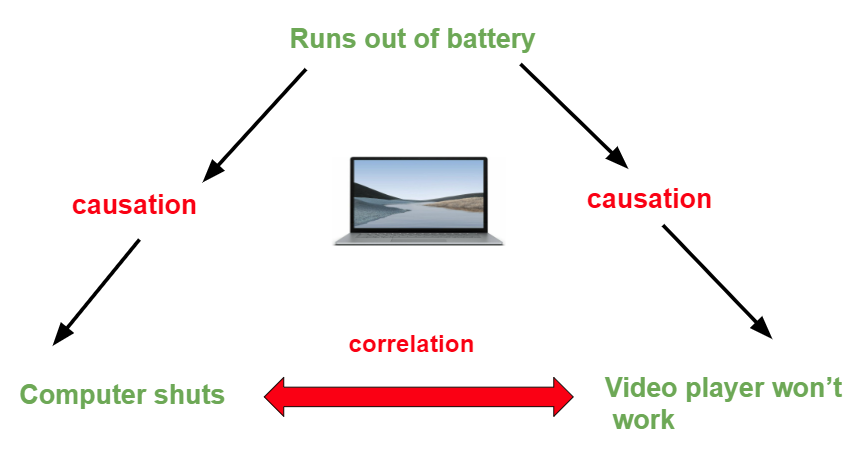

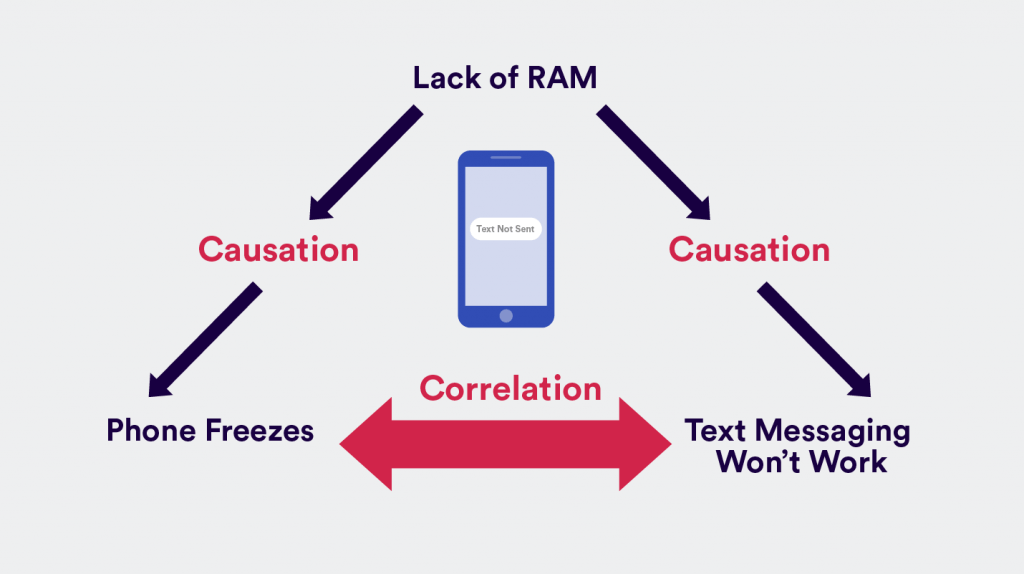